# 绘制动画

可通过 `matplotlib.animation` 模块下的 `FuncAnimation` 类创建动画

`FuncAnimation`

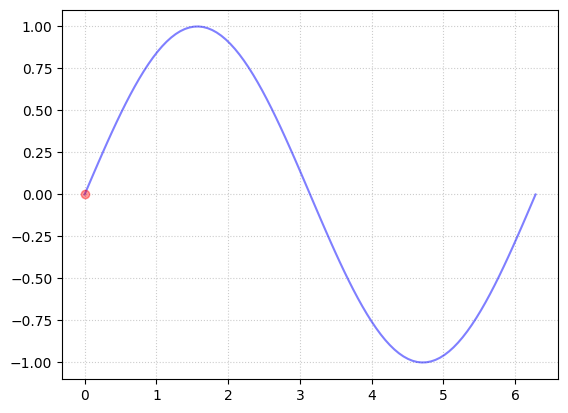

In [9]:
from typing import Iterable

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.animation import FuncAnimation
from matplotlib.artist import Artist


def calculate_slope(x_: float) -> float:
    """计算斜率

    已知直线上的两个点 `(x1, y1), (x2, y2)`, 则斜率 `k = (y2 - y1) / (x2 - x1)`

    Args:
        `x_` (`float`): x 轴坐标值

    Returns:
        `float`: 斜率值
    """
    x1: float = x_ + 0.05
    y1: float = np.sin(x1)

    x2: float = x_ - 0.05
    y2: float = np.sin(x2)
    return (y2 - y1) / (x2 - x1)


def calculate_tangent_line(
    x_: float,
    y_: float,
    k_: float,
) -> tuple[np.ndarray[tuple[int, ...], any], np.ndarray[tuple[int, ...], any]]:
    """已知斜率, 计算指定坐标点的切线

    Args:
        `x_` (`float`): _description_
        `y_` (`float`): _description_
        `k_` (`float`): _description_

    Returns:
        Tuple[ndarray, ndarray]: _description_
    """
    # 将 x 坐标点 1 个单位分割为 100 份
    xs = np.linspace(x_ - 0.5, x_ + 0.5, 100)
    # 通过斜率计算切线在 y 轴的坐标
    # 通过 x 坐标的变化量计算 y 坐标的变化量, 从而计算 y 坐标值
    ys = y_ + k_ * (xs - x_)
    return xs, ys


# 初始化画布
fig = plt.figure()

# 绘制网格
plt.grid(
    ls=":",  # 网格线型
    color="#ccc",  # 网格颜色
)

x = np.linspace(0, 2 * np.pi, 100)  # 计算 2pi 弧度内 100 个 x 轴坐标
y = np.sin(x)  # 计算对应的 y 轴坐标

# 绘制正弦曲线
plt.plot(x, y, "b", alpha=0.5)

# 绘制 x, y 的坐标标识
x_text = plt.text(5, 0.9, "", fontsize=10)
y_text = plt.text(5, 0.75, "", fontsize=10)
k_text = plt.text(5, 0.6, "", fontsize=10)

# 绘制曲线上的切点
(point,) = plt.plot(0, 0, "r", alpha=0.4, marker="o")


def update(n: np.int64) -> Iterable[Artist]:
    # 计算切线坐标
    k = calculate_slope(x[n])  # 计算斜率
    xs, ys = calculate_tangent_line(x[n], y[n], k)  # 计算切线

    # 更新曲线上的切点坐标
    point.set_data((x[n],), (y[n],))

    # 更新切线的坐标
    tangent_line.set_data(xs, ys)

    # 更新坐标标识
    x_text.set_text(f"x={x[n]:.3f}")
    y_text.set_text(f"y={y[n]:.3f}")
    k_text.set_text(f"k={k:.3f}")

    return point, tangent_line, x_text, y_text, k_text


# 设置动画
_ = FuncAnimation(  # 这里必须要对变量赋值, 否则动画无法播放
    fig=fig,
    func=update,
    frames=np.arange(0, 100),
    interval=100,
)

# 显示绘图
plt.show()